# Image Augumentation
Augmentation is the process of creating data using existing dataset. In this, given a small set of images, more images can be created by rotating the images across different axis.

## Why?
When we have a small dataset of image, there is a high chance that data will overfit the training dataset. Imagine a cat that is sitting or standing,is a part of a give dataset of 100 images. If you train the dataset with those images, but the validation dataset has many images where the cats are lying down or lying on thier back and looking upside down, the validation accuracy would be very low. Augmentation of random taring dataset can create more images by rotating the images on horizontal and vertical axis or across z-axis can help us :
- Create more images
- Create a variety of images
- Slow down training

In [27]:
import tensorflow as tf

#Define cats and dogs base folders
basedir = 'c:/Dinesh/github-proj/tensorflow-cert/data/cats_and_dogs_filtered/'
train_cats = basedir + 'train/cats'
train_dogs =  basedir + 'train/dogs'
valid_cats = basedir + 'validation/cats'
valid_dogs =  basedir + 'validation/dogs'


In [28]:
#Define model
layers = tf.keras.layers
model = tf.keras.models.Sequential([
    layers.Conv2D(16,kernel_size=(3,3),input_shape=(150,150,3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(32,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(1,activation='sigmoid')

])

In [29]:
#Define compilation and error loss
from tensorflow.keras.optimizers import RMSprop
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['accuracy'])

In [30]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#Define input feed
train_data = ImageDataGenerator(rescale=1.0/255.)
test_data = ImageDataGenerator(rescale=1.0/255.)

train_data=train_data.flow_from_directory(basedir+'train',
                               target_size=(150,150),
                               batch_size=10,
                               class_mode='binary')
test_data=test_data.flow_from_directory(basedir + 'validation',
                              batch_size=10,
                              target_size=(150, 150),
                              class_mode='binary')



Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [36]:
history=model.fit(train_data,
          
          steps_per_epoch=100,
          epochs=20,
          
          validation_data=test_data,
          validation_steps=50,
          
          verbose=2
          )




Epoch 1/20
100/100 - 33s - loss: 0.3228 - accuracy: 0.8660 - val_loss: 0.6362 - val_accuracy: 0.6960
Epoch 2/20
100/100 - 38s - loss: 0.2790 - accuracy: 0.8860 - val_loss: 0.5747 - val_accuracy: 0.7280
Epoch 3/20
100/100 - 36s - loss: 0.2726 - accuracy: 0.8840 - val_loss: 0.6481 - val_accuracy: 0.6940
Epoch 4/20
100/100 - 31s - loss: 0.2315 - accuracy: 0.9080 - val_loss: 0.7663 - val_accuracy: 0.6740
Epoch 5/20
100/100 - 31s - loss: 0.2007 - accuracy: 0.9300 - val_loss: 0.6560 - val_accuracy: 0.7060
Epoch 6/20
100/100 - 35s - loss: 0.1768 - accuracy: 0.9400 - val_loss: 0.7348 - val_accuracy: 0.7160
Epoch 7/20
100/100 - 38s - loss: 0.1508 - accuracy: 0.9520 - val_loss: 0.7521 - val_accuracy: 0.6940
Epoch 8/20
100/100 - 33s - loss: 0.1408 - accuracy: 0.9570 - val_loss: 0.7611 - val_accuracy: 0.7200
Epoch 9/20
100/100 - 32s - loss: 0.1130 - accuracy: 0.9600 - val_loss: 0.8799 - val_accuracy: 0.6860
Epoch 10/20
100/100 - 34s - loss: 0.0989 - accuracy: 0.9740 - val_loss: 0.8065 - val_accura

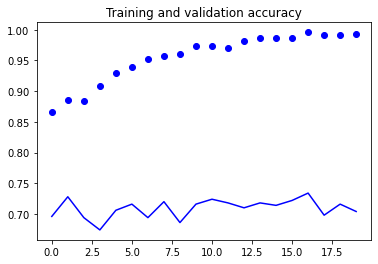

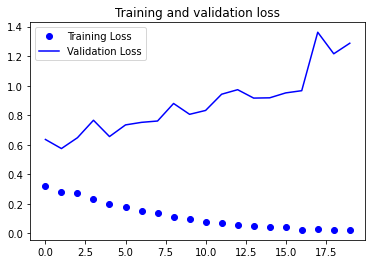

In [37]:
from matplotlib import pyplot as plt
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs = range(len(acc))

#Plot validation accuracy
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()




In [ ]:
#Define input feed
train_data = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
test_data = ImageDataGenerator(rescale=1.0/255.)

train_data=train_data.flow_from_directory(basedir+'train',
                               target_size=(150,150),
                               batch_size=10,
                               class_mode='binary')
test_data=test_data.flow_from_directory(basedir + 'validation',
                              batch_size=10,
                              target_size=(150, 150),
                              class_mode='binary')



In [ ]:
history=model.fit_generator(train_data,
          
          steps_per_epoch=100,
          epochs=100,
          
          validation_data=test_data,
          validation_steps=50,
          
          verbose=2
          )

In [ ]:
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs = range(len(acc))

#Plot validation accuracy
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
history=model.fit(train_data,
          
          steps_per_epoch=100,
          epochs=100,
          
          validation_data=test_data,
          validation_steps=50,
          
          verbose=2
          )

Epoch 1/100
100/100 - 34s - loss: 0.5473 - accuracy: 0.7250 - val_loss: 0.5994 - val_accuracy: 0.7200
Epoch 2/100
100/100 - 34s - loss: 0.5524 - accuracy: 0.7080 - val_loss: 0.5026 - val_accuracy: 0.7440
Epoch 3/100
100/100 - 35s - loss: 0.5456 - accuracy: 0.7240 - val_loss: 0.5001 - val_accuracy: 0.7500
Epoch 4/100
100/100 - 35s - loss: 0.5358 - accuracy: 0.7340 - val_loss: 0.5070 - val_accuracy: 0.7600
Epoch 5/100
100/100 - 34s - loss: 0.5491 - accuracy: 0.7220 - val_loss: 0.5070 - val_accuracy: 0.7760
Epoch 6/100
100/100 - 34s - loss: 0.5247 - accuracy: 0.7420 - val_loss: 0.5027 - val_accuracy: 0.7480
Epoch 7/100
100/100 - 35s - loss: 0.5394 - accuracy: 0.7250 - val_loss: 0.5647 - val_accuracy: 0.7740
Epoch 8/100
100/100 - 35s - loss: 0.5347 - accuracy: 0.7090 - val_loss: 0.5492 - val_accuracy: 0.7200
Epoch 9/100
100/100 - 35s - loss: 0.5448 - accuracy: 0.7250 - val_loss: 0.5248 - val_accuracy: 0.7480
Epoch 10/100
100/100 - 35s - loss: 0.5135 - accuracy: 0.7390 - val_loss: 0.5139 - 

In [ ]:
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs = range(len(acc))

#Plot validation accuracy
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()